In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

: 

In [ ]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

reviews  stars        date  \
0  Not Verified | I booked two business class sea...    5.0  2024-08-27   
1  Not Verified | Although all four flights were ...    1.0  2024-08-26   
2  ✅ Trip Verified |   Flight changed just one da...    9.0  2024-08-26   
3  Not Verified | Delayed flight 1 hour. Arbitrar...    1.0  2024-08-25   
4  Not Verified | Flown with BA four times. As an...    2.0  2024-08-25   

          country  verified                                             corpus  
0   United States     False  verified booked two business class seat medica...  
1  United Kingdom     False  verified although four flight delayed service ...  
2  United Kingdom      True  flight changed one day british airway titan fl...  
3  United Kingdom     False  verified delayed flight hour arbitrary cancell...  
4  United Kingdom     False  verified flown ba four time anxious traveller ...

In [ ]:
df.stars.mean()

4.602784675416815

Text(0.5, 0.98, 'Counts for each ratings')

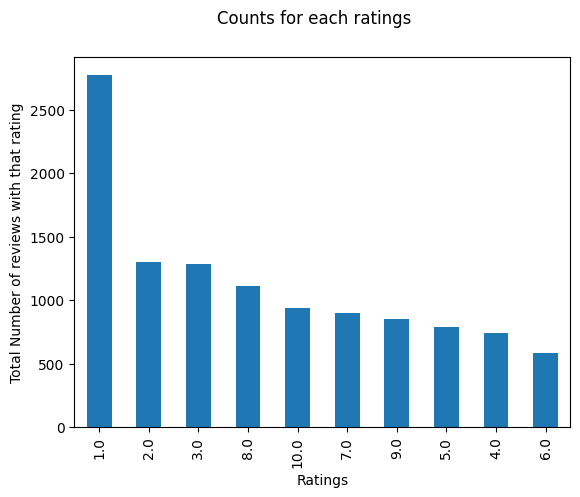

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts()).reset_index()
df_ratings.columns = ['stars', 'count']  # Rename columns for clarity

# Calculate percentage values
pct_values = (df_ratings['count'].values / df_ratings['count'].sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]

# Add the percentage values to the DataFrame
df_ratings['pct_values'] = pct_values


In [ ]:
df_ratings = df_ratings.reset_index()

In [ ]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings

Stars  total_counts  count  pct_values
0      0           1.0   2775       24.61
1      1           2.0   1301       11.54
2      2           3.0   1287       11.41
3      3           8.0   1112        9.86
4      4          10.0    940        8.34
5      5           7.0    900        7.98
6      6           9.0    855        7.58
7      7           5.0    788        6.99
8      8           4.0    738        6.54
9      9           6.0    580        5.14

C:\Users\jaini\AppData\Local\Temp\ipykernel_3996\2042004180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
C:\Users\jaini\AppData\Local\Temp\ipykernel_3996\2042004180.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

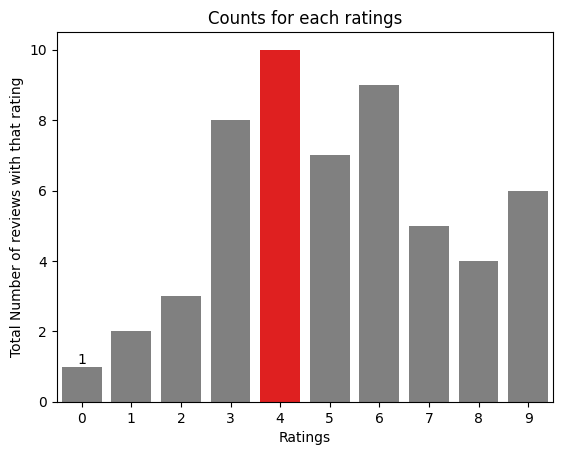

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
print(f"{len(df.country.unique())} unique countries")

67 unique countries


In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

Text(0.5, 1.0, 'Maximum number of review by country')

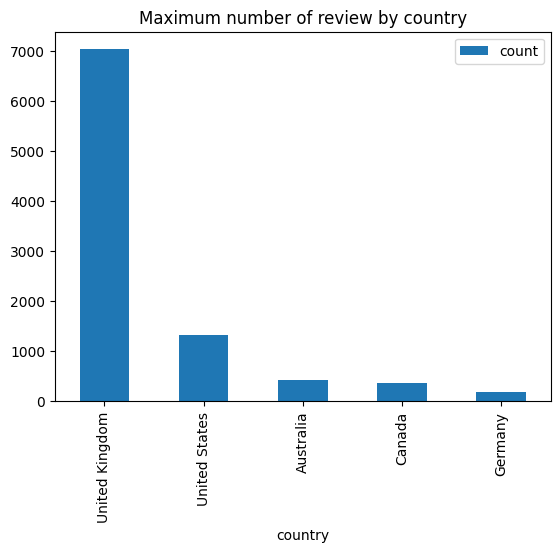

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [ ]:
df.date = pd.to_datetime(df.date)

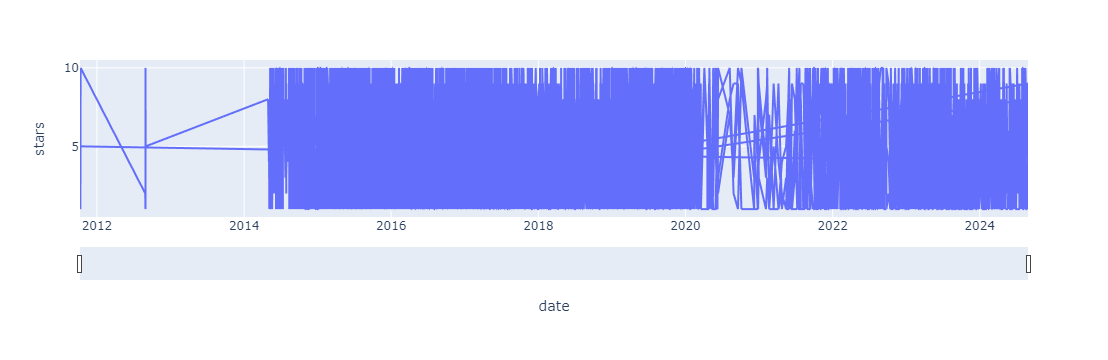

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

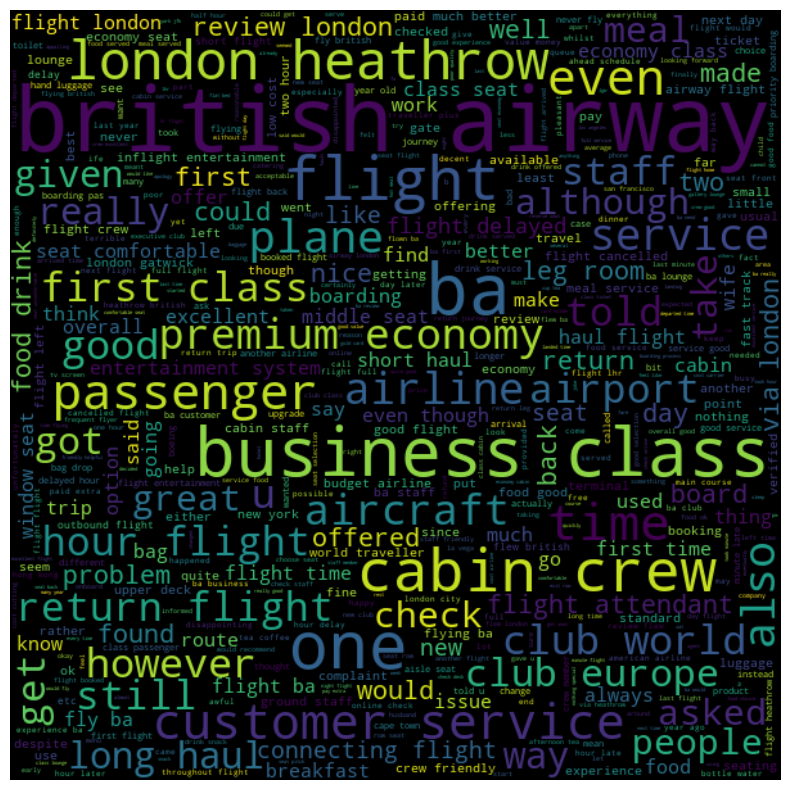

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

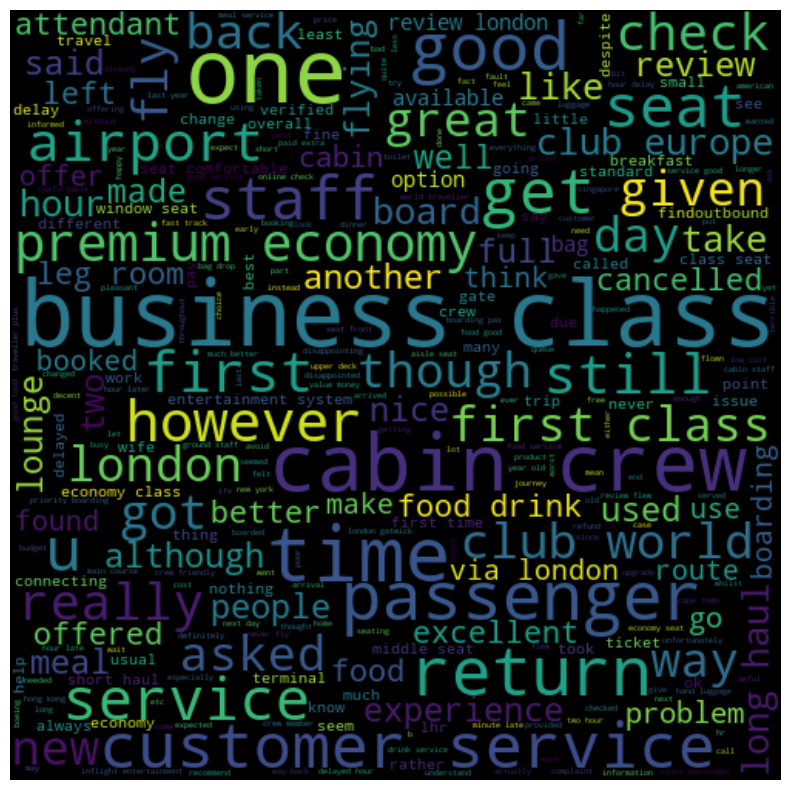

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'hour'),
  Text(8, 0, 'class'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'experience')])

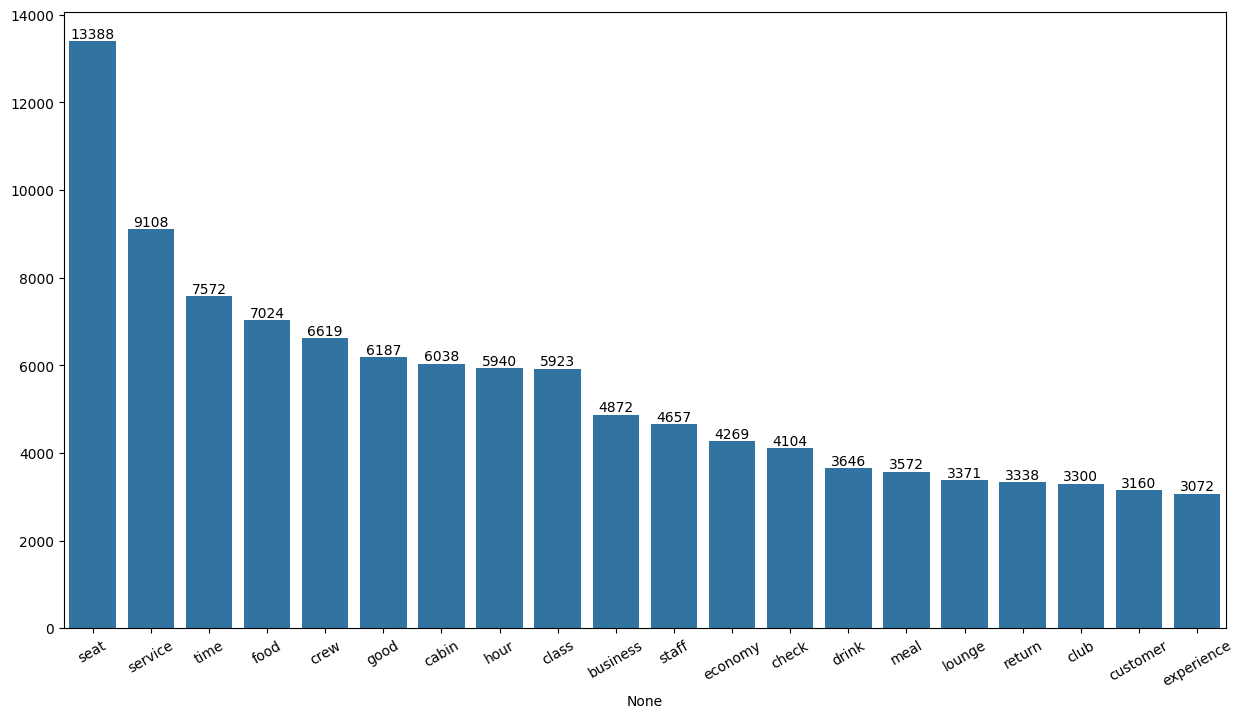

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

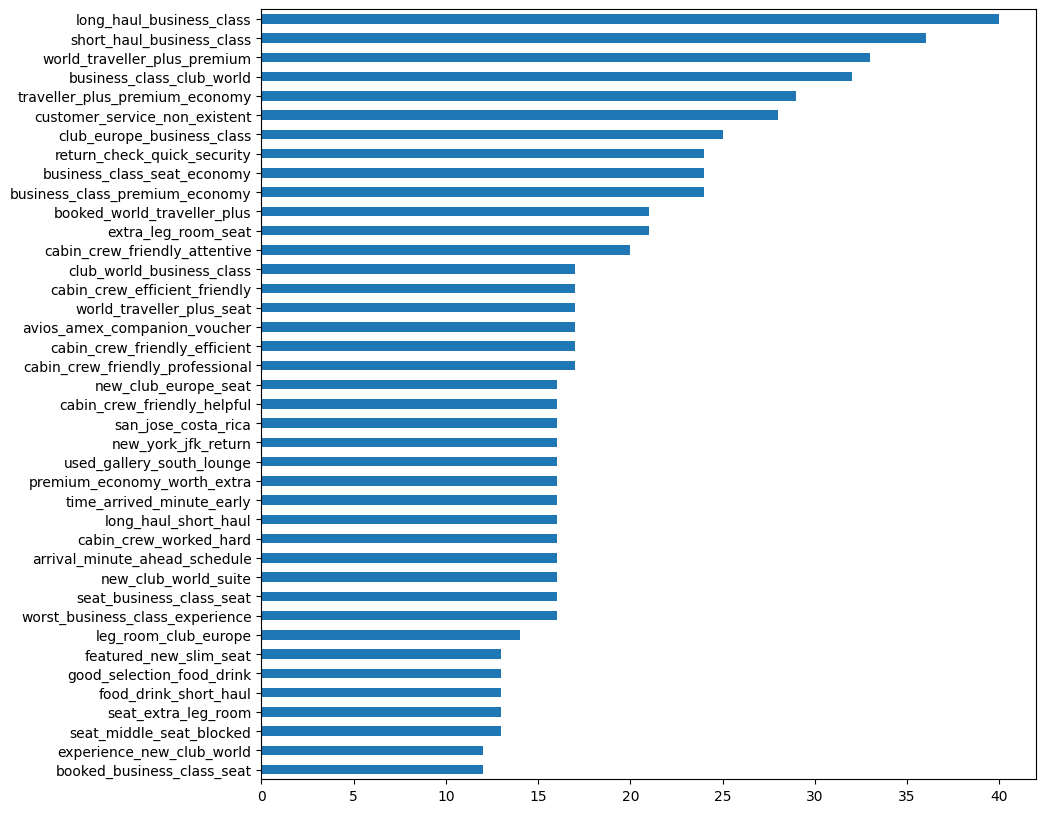

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)